<a href="https://colab.research.google.com/github/mihaipatrascanu/ce888-repo/blob/main/Assigment_2/Assigment_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving 2021-01-dorset-street.csv to 2021-01-dorset-street.csv


In [2]:
#Read dataset using pandas

import pandas as pd
dorset=pd.read_csv("2021-01-dorset-street.csv")
dorset.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2021-01,Dorset Police,Dorset Police,-1.894945,50.767338,On or near Graycot Close,E01015301,Bournemouth 001A,Anti-social behaviour,NaN,NaN
1,14c2f31c5a999e032192343f96603c5fa57f239aca49ce...,2021-01,Dorset Police,Dorset Police,-1.888833,50.767494,On or near Wimborne Road,E01015301,Bournemouth 001A,Bicycle theft,Unable to prosecute suspect,NaN
2,5d55c1bb9965966e199fbc69cdba733a566017da0f1e5a...,2021-01,Dorset Police,Dorset Police,-1.893708,50.769028,On or near Pearson Gardens,E01015301,Bournemouth 001A,Drugs,Offender given a caution,NaN
3,84e50b0b3e458473345fcdaf024f26026238b79ddd2b84...,2021-01,Dorset Police,Dorset Police,-1.893416,50.766572,On or near Timothy Close,E01015301,Bournemouth 001A,Vehicle crime,Investigation complete; no suspect identified,NaN
4,98aefa83ba2fa7848a6604866c5824d505ae5992c3d733...,2021-01,Dorset Police,Dorset Police,-1.893708,50.769028,On or near Pearson Gardens,E01015301,Bournemouth 001A,Violence and sexual offences,Unable to prosecute suspect,NaN


In [3]:
#read shape of a data

dorset.shape

(5363, 12)

In [4]:
###Data Cleaning

In [5]:
#check null values

dorset.isnull().sum()

Crime ID                 2085
Month                       0
Reported by                 0
Falls within                0
Longitude                  65
Latitude                   65
Location                    0
LSOA code                  65
LSOA name                  65
Crime type                  0
Last outcome category    2085
Context                  5363
dtype: int64

In [6]:
#Drop unwanted columns using drop function

dorset1=dorset.drop(['Falls within','Reported by','Context','Month','LSOA name','Crime ID','Location'],axis=1)
dorset1.head()

,Longitude,Latitude,LSOA code,Crime type,Last outcome category
0,-1.894945,50.767338,E01015301,Anti-social behaviour,NaN
1,-1.888833,50.767494,E01015301,Bicycle theft,Unable to prosecute suspect
2,-1.893708,50.769028,E01015301,Drugs,Offender given a caution
3,-1.893416,50.766572,E01015301,Vehicle crime,Investigation complete; no suspect identified
4,-1.893708,50.769028,E01015301,Violence and sexual offences,Unable to prosecute suspect


In [7]:
#drop the null value rows and reset the index

dorset1=dorset1.dropna()
dorset2=dorset1.reset_index(drop=True)
dorset2.head()

,Longitude,Latitude,LSOA code,Crime type,Last outcome category
0,-1.888833,50.767494,E01015301,Bicycle theft,Unable to prosecute suspect
1,-1.893708,50.769028,E01015301,Drugs,Offender given a caution
2,-1.893416,50.766572,E01015301,Vehicle crime,Investigation complete; no suspect identified
3,-1.893708,50.769028,E01015301,Violence and sexual offences,Unable to prosecute suspect
4,-1.893708,50.769028,E01015301,Violence and sexual offences,Unable to prosecute suspect


In [ ]:
###Data Preprocessing

In [8]:
#check data types
dorset2.dtypes

Longitude                float64
Latitude                 float64
LSOA code                 object
Crime type                object
Last outcome category     object
dtype: object

In [9]:
#apply label encoding

from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()
label2=LabelEncoder()
label3=LabelEncoder()
dorset2['Crime type']=label1.fit_transform(dorset2['Crime type'])
dorset2['Last outcome category']=label2.fit_transform(dorset2['Last outcome category'])
dorset2['LSOA code']=label3.fit_transform(dorset2['LSOA code'])
dorset2.head()

,Longitude,Latitude,LSOA code,Crime type,Last outcome category
0,-1.888833,50.767494,28,0,8
1,-1.893708,50.769028,28,3,7
2,-1.893416,50.766572,28,11,5
3,-1.893708,50.769028,28,12,8
4,-1.893708,50.769028,28,12,8


In [ ]:
###Standardization

In [10]:
#Apply the standarization

from sklearn.preprocessing import StandardScaler
stnd = StandardScaler()
stnd1=stnd.fit_transform(dorset2)
data = pd.DataFrame(data=stnd1, columns=dorset2.columns)
dorset2=data

In [11]:
###Train Test Split

In [12]:
#take dependent and independent variables

x=dorset2.drop(['Last outcome category'],axis=1)
y=dorset2['Last outcome category']

In [13]:
#Splitting of a dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
###Decision Tree Regression

In [14]:
#Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)

y_predict=reg.predict(x_test)
y_predict

array([-0.59232392, -0.59232392, -0.59232392, -1.66006223,  0.68896205,
        0.68896205, -2.72780054,  0.68896205,  1.11605737,  1.11605737,
       -1.44651457,  1.11605737, -0.59232392,  1.11605737, -0.59232392,
       -0.33606673, -0.59232392,  1.11605737, -0.59232392, -0.59232392,
       -1.87360989,  0.83132716, -2.30070522,  0.68896205, -2.30070522,
        1.11605737,  0.68896205, -0.59232392,  0.83132716,  0.68896205,
       -0.59232392, -0.59232392, -0.59232392, -1.73124479, -0.59232392,
       -0.59232392, -0.59232392, -2.72780054,  0.83132716,  1.11605737,
       -2.30070522, -0.59232392, -2.30070522,  0.68896205, -0.59232392,
       -0.59232392,  1.11605737,  1.11605737,  0.68896205, -0.59232392,
       -2.30070522, -2.72780054,  0.68896205, -0.59232392,  0.68896205,
       -0.59232392, -0.59232392,  0.68896205, -2.30070522,  0.54659694,
       -0.59232392,  0.04831906,  0.68896205, -0.59232392, -2.72780054,
       -0.59232392,  0.68896205,  0.68896205, -0.59232392,  1.11

In [15]:
#Evaluation metrics of decision tree regression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

print("Mean Absolute Error of Decision Tree Regression:- ",mean_absolute_error(y_test,y_predict))
print("R2 Square Value of Decision Tree Regression:- ",r2_score(y_test,y_predict))

Mean Absolute Error of Decision Tree Regression:-  0.7769025127852389
R2 Square Value of Decision Tree Regression:-  -0.5474966852104466


In [ ]:
###XG Boost Regression

In [16]:
#xg boost regression

import xgboost as xg
xgb_reg = xg.XGBRegressor()
xgb_reg.fit(x_train,y_train)

y_predict1=xgb_reg.predict(x_test)
y_predict1

[22:52:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-3.09554636e-01, -3.88736784e-01, -2.53395438e-01,  4.11776006e-02,
        1.50720865e-01,  2.03830540e-01,  1.06124669e-01,  3.81906956e-01,
        8.30828547e-02, -3.01872671e-01,  3.56900990e-02,  2.36319661e-01,
       -3.27201486e-01,  2.49643147e-01, -4.64831889e-01, -5.94419241e-02,
       -1.73049808e-01,  1.57440990e-01,  1.62847459e-01, -5.00929952e-02,
        2.31705844e-01,  4.88977343e-01,  1.60571694e-01,  1.50720865e-01,
       -6.54003382e-01,  3.36300850e-01,  2.82829374e-01, -1.84842408e-01,
        2.28006452e-01,  2.95371532e-01, -6.54003382e-01, -3.98954868e-01,
        5.20664752e-02, -8.32100511e-02, -2.13513970e-01, -2.14891732e-01,
       -2.97342122e-01,  2.43674070e-01,  4.97346103e-01, -3.85795236e-01,
       -1.91412270e-01, -2.64453948e-01,  1.77813023e-01,  4.07471687e-01,
       -3.23745489e-01,  4.58023220e-01, -3.91668141e-01,  3.36300850e-01,
       -3.47338259e-01, -4.24643755e-01,  7.45155513e-02, -1.02252662e-01,
        6.02939606e-01, -

In [17]:
#Evaluation metrics of xg boost regression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from math import sqrt

print("Mean Absolute Error of XGB Regression:- ",mean_absolute_error(y_test,y_predict1))
print("Root Mean Squared Error of XGB Regression:- ",sqrt(mean_squared_error(y_test,y_predict1)))
print("R2 Square Value of XGB Regression:- ",r2_score(y_test,y_predict1))

Mean Absolute Error of XGB Regression:-  0.7306514693676539
Root Mean Squared Error of XGB Regression:-  0.9647820179979281
R2 Square Value of XGB Regression:-  0.08232108293072848


In [ ]:
###Data Visualization

In [18]:
#Geographic Map
import plotly.express as px
fig = px.density_mapbox(dorset2, lat=dorset2['Latitude'], lon=dorset2['Longitude'], z='Last outcome category', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

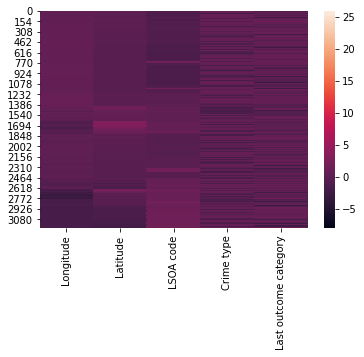

In [19]:
#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(dorset2)
plt.show()